In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Customertravel.csv")

In [6]:
df.head(2)

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1


In [7]:
df.tail(2)

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
952,30,No,Low Income,1,Yes,Yes,0
953,31,Yes,High Income,1,No,No,0


In [8]:
df.info

<bound method DataFrame.info of      Age FrequentFlyer AnnualIncomeClass  ServicesOpted  \
0     34            No     Middle Income              6   
1     34           Yes        Low Income              5   
2     37            No     Middle Income              3   
3     30            No     Middle Income              2   
4     30            No        Low Income              1   
..   ...           ...               ...            ...   
949   31           Yes        Low Income              1   
950   30            No     Middle Income              5   
951   37            No     Middle Income              4   
952   30            No        Low Income              1   
953   31           Yes       High Income              1   

    AccountSyncedToSocialMedia BookedHotelOrNot  Target  
0                           No              Yes       0  
1                          Yes               No       1  
2                          Yes               No       0  
3                          

In [13]:
df['over_30'] = df['Age'] > 30
df

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target,over_30
0,34,No,Middle Income,6,No,Yes,0,True
1,34,Yes,Low Income,5,Yes,No,1,True
2,37,No,Middle Income,3,Yes,No,0,True
3,30,No,Middle Income,2,No,No,0,False
4,30,No,Low Income,1,No,No,0,False
...,...,...,...,...,...,...,...,...
949,31,Yes,Low Income,1,No,No,0,True
950,30,No,Middle Income,5,No,Yes,0,False
951,37,No,Middle Income,4,No,No,0,True
952,30,No,Low Income,1,Yes,Yes,0,False


In [15]:
df['ServicesOpted'].mean()

2.4371069182389937

In [20]:
count_no = df['FrequentFlyer'].value_counts().get('No', 0)
count_yes = df['FrequentFlyer'].value_counts().get('Yes', 0)
count_no

608

In [21]:
count_yes

286

[Text(0.5, 1.0, 'Frequency Flyer')]

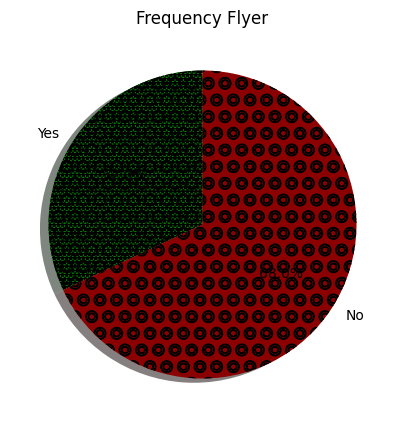

In [55]:
fig, ax = plt.subplots(figsize = (5, 5))
labels = ['Yes', 'No']
sizes = [count_yes, count_no]
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['Green', '#8B0000'], hatch=['****O', 'oO', '***O.O', '.||.'],
      shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9}, startangle=90);

ax.set(title="Frequency Flyer")


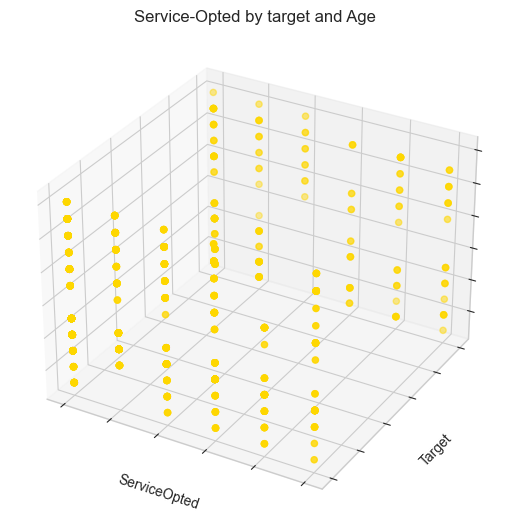

In [106]:
plt.style.use('_mpl-gallery')

xs = df['ServicesOpted']
ys = df['Target']
zs = df['Age']

colors = {'ServiceOpted': 'black', 'Target': 'blue'}
c = [colors.get(col, '#FFD700') for col in xs]

# Plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize = (5, 5))
ax.scatter(xs, ys, zs, c=c)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

ax.set(title= 'Service-Opted by target and Age', xlabel= 'ServiceOpted', ylabel= 'Target', zlabel= 'Age')

plt.show()

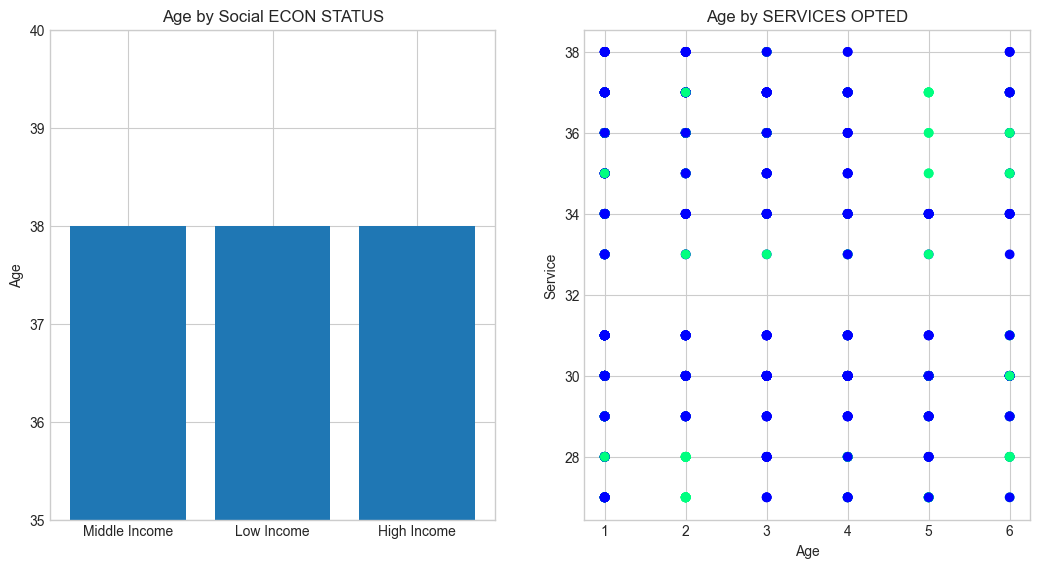

In [112]:
fig,(ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
graph_1 = ax0.bar(x= df['AnnualIncomeClass'], height=df['Age'])
graph_2 = ax1.scatter(x=df['ServicesOpted'], y=df['Age'], c=df['Target'], cmap='winter')

graph_1 = ax0.set(title="Age by Social ECON STATUS", ylabel='Age')
graph_2 = ax1.set(title='Age by SERVICES OPTED', xlabel= 'Age', ylabel='Service')

graph_1 = ax0.set_ylim([35, 40])